In [36]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving eda_data.csv to eda_data.csv


In [3]:
df = pd.read_csv('eda_data.csv')

In [4]:
df.head()

,datetime,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,icon,stations
0,1971-01-01,United States,33.6,25.6,30.2,25.0,15.1,19.6,22.8,73.8,...,1007.2,69.6,4.6,1971-01-01T07:26:54,1971-01-01T16:56:27,0.15,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72403793728,74594013705"
1,1971-01-02,United States,38.6,21.3,29.9,38.6,14.7,27.2,19.8,66.2,...,1021.2,64.9,6.8,1971-01-02T07:27:02,1971-01-02T16:57:15,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
2,1971-01-03,United States,38.3,21.3,29.5,38.3,21.3,28.6,22.7,76.3,...,1026.3,33.7,6.4,1971-01-03T07:27:09,1971-01-03T16:58:06,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
3,1971-01-04,United States,41.0,30.6,35.9,41.0,27.2,34.3,33.3,90.1,...,1018.1,99.7,1.7,1971-01-04T07:27:12,1971-01-04T16:58:58,0.26,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72403793728,74594013705"
4,1971-01-05,United States,44.5,34.3,40.3,41.5,27.2,34.7,30.8,69.7,...,1014.6,97.0,5.1,1971-01-05T07:27:14,1971-01-05T16:59:51,0.29,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72403793728,74594013705"


In [5]:
df.isnull().sum()

datetime            0
name                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [6]:
df.dtypes

datetime             object
name                 object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17868 entries, 0 to 17867
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          17868 non-null  object 
 1   name              17868 non-null  object 
 2   tempmax           17868 non-null  float64
 3   tempmin           17868 non-null  float64
 4   temp              17868 non-null  float64
 5   feelslikemax      17868 non-null  float64
 6   feelslikemin      17868 non-null  float64
 7   feelslike         17868 non-null  float64
 8   dew               17868 non-null  float64
 9   humidity          17868 non-null  float64
 10  precip            17868 non-null  float64
 11  precipprob        17868 non-null  int64  
 12  precipcover       17868 non-null  float64
 13  preciptype        17868 non-null  object 
 14  windspeed         17868 non-null  float64
 15  winddir           17868 non-null  float64
 16  sealevelpressure  17868 non-null  float6

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df.set_index('datetime', inplace = True)
df.sort_index(inplace = True)

df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
1971-01-01,United States,33.6,25.6,30.2,25.0,15.1,19.6,22.8,73.8,0.460,...,1007.2,69.6,4.6,1971-01-01T07:26:54,1971-01-01T16:56:27,0.15,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72403793728,74594013705"
1971-01-02,United States,38.6,21.3,29.9,38.6,14.7,27.2,19.8,66.2,0.000,...,1021.2,64.9,6.8,1971-01-02T07:27:02,1971-01-02T16:57:15,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
1971-01-03,United States,38.3,21.3,29.5,38.3,21.3,28.6,22.7,76.3,0.000,...,1026.3,33.7,6.4,1971-01-03T07:27:09,1971-01-03T16:58:06,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
1971-01-04,United States,41.0,30.6,35.9,41.0,27.2,34.3,33.3,90.1,0.800,...,1018.1,99.7,1.7,1971-01-04T07:27:12,1971-01-04T16:58:58,0.26,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72403793728,74594013705"
1971-01-05,United States,44.5,34.3,40.3,41.5,27.2,34.7,30.8,69.7,0.306,...,1014.6,97.0,5.1,1971-01-05T07:27:14,1971-01-05T16:59:51,0.29,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72403793728,74594013705"


In [11]:
features = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'moonphase']
X = df[features]
y = df['precip']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [13]:
X_train.tail()

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
datetime,,,,,,,,,,,
2007-10-05,79.6,69.4,72.9,66.7,81.8,5.8,142.7,1025.2,84.5,9.0,0.81
2007-10-06,82.0,68.4,73.9,66.9,79.9,9.6,180.5,1022.6,65.1,8.4,0.84
2007-10-07,91.0,66.2,77.2,64.4,68.7,13.1,305.3,1017.9,27.4,9.1,0.88
2007-10-08,89.6,67.7,75.9,67.4,76.9,9.6,175.5,1016.0,43.1,6.6,0.91
2007-10-09,92.0,71.0,79.8,64.9,64.2,10.6,213.0,1010.1,65.2,7.7,0.95


In [14]:
X_test.head()

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
datetime,,,,,,,,,,,
2007-10-10,82.1,70.7,75.1,55.3,52.7,12.3,231.3,1006.5,66.9,9.9,0.98
2007-10-11,67.9,55.9,60.3,40.9,49.3,18.1,312.7,1005.2,79.5,9.9,0.00
2007-10-12,69.7,53.8,60.5,39.1,47.6,25.2,306.5,1009.1,44.5,9.9,0.05
2007-10-13,69.7,52.9,60.7,37.9,44.0,14.1,292.9,1016.2,46.6,9.9,0.08
2007-10-14,71.5,48.6,60.2,39.6,48.8,13.1,301.1,1020.0,14.6,9.9,0.12


In [15]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [16]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length = 3,
                                      batch_size = 64)

In [17]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length = 3, batch_size = 64)

In [18]:
input_shape = train_sequences[0][0][0].shape

In [39]:
model = Sequential()

model.add(GRU(8, input_shape = input_shape, return_sequences = True)) # True when next layer is also RNN
model.add(GRU(16, return_sequences = False)) # False is next layer is Dense/Not RNN
model.add(Dense(8, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation = None))

# I want to add r2 as metric but HOW!?

In [40]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam', metrics = 'mse')

es = EarlyStopping(patience = 15)

history = model.fit(train_sequences,
                    validation_data = test_sequences,
                    callbacks = [es],
                    epochs = 50)

Epoch 1/50
210/210 [==============================] - 5s 8ms/step - loss: 0.2045 - mse: 0.1264 - val_loss: 0.1603 - val_mse: 0.1108
Epoch 2/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1463 - mse: 0.1143 - val_loss: 0.1289 - val_mse: 0.1100
Epoch 3/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1255 - mse: 0.1135 - val_loss: 0.1163 - val_mse: 0.1093
Epoch 4/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1170 - mse: 0.1125 - val_loss: 0.1111 - val_mse: 0.1083
Epoch 5/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1135 - mse: 0.1115 - val_loss: 0.1085 - val_mse: 0.1072
Epoch 6/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1113 - mse: 0.1102 - val_loss: 0.1071 - val_mse: 0.1062
Epoch 7/50
210/210 [==============================] - 1s 5ms/step - loss: 0.1110 - mse: 0.1103 - val_loss: 0.1068 - val_mse: 0.1062
Epoch 8/50
210/210 [==============================] - 2s 7ms/step - loss: 0.

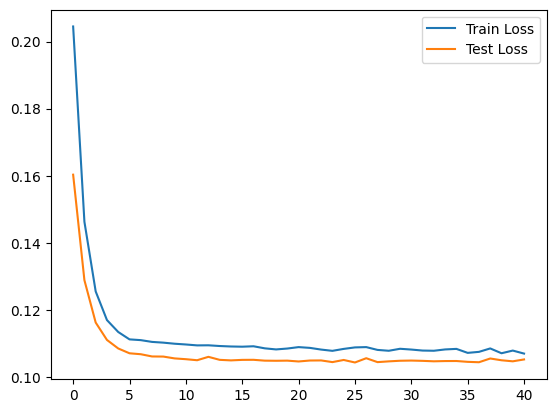

In [41]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [ ]:
# Figuring out predictions and graphing next year

In [25]:
model.evaluate(X_test_sc)

ValueError: ignored